In [3]:
from knowknow import *

In [4]:
from load_db import db as dta

loading variable sociology-wos-74b/groups from disk
loading variable sociology-wos-74b/group_reps from disk
loading variable sociology-wos-74b/_attributes from disk


In [10]:
dta.search('c', 'Portes, A.|1998')

['Portes, A.|1998|annu rev sociol,v24,p1',
 'Portes, A.|1998|sociol educ,v71,p269']

In [5]:
from load_db import db as db

# marianne weber isn't here...

In [13]:
def key2name(tname, truncate=None):
    tstr = tname.split("|")
    if len(tstr) == 3:
        tstr = "%s (%s)\n%s" % (tstr[0], tstr[1], tstr[2])
    else:
        if False and tname in dd:
            yy = dd[tname][2]
        else:
            yy = db.trend('c', tname).first
        tstr = "%s (%s*)\n%s" % (tstr[0], yy, tstr[1])
    tstr = tstr.lower()
    return tstr

def author_fig(K, limit=None):
    pubs = db.search('c',"%s|"%K)

    def first_10(x):
        tt = db.trend('c', x)
        return sum( tt.cits( tt.first, min(tt.data_end, tt.first+10) ) )

    def total(x):
        return db(c=x).cits

    def first_r(x):
        tt = db.trend('c', x)
        return (tt.first, tt.first+10)

    if limit is not None:
        pubs = sorted(pubs, key=lambda x:-db(c=x).cits)[:limit]
        
    pubs = sorted(pubs)
    

    viz.yearly_counts_table(db, 
        pubs, 
        NCOLS=2, 
        yearlim=(1950,2015), 
        tickstep=20,
        print_names={
            x: key2name(x)#"%s\n%s".join( x.split("|")[1:] )[:30] + "..."
            for x in pubs
        },
        #markranges={
        #    x:first_r(x)
        #    for x in pubs
        #}
    )
    #plt.title("Talcott Parsons")

In [7]:
dta.search('c','Pareto')

['Henderson, L.|paretos general soci',
 'Homans, G.|intro pareto',
 'Pareto, V.|cours ec politique',
 'Pareto, V.|manual political ec',
 'Pareto, V.|manuel ec politique',
 'Pareto, V.|mind soc',
 'Pareto, V.|rise fall elites',
 'Pareto, V.|sociological writing',
 'Pareto, V.|systemes socialistes',
 'Pareto, V.|treatise general soc']

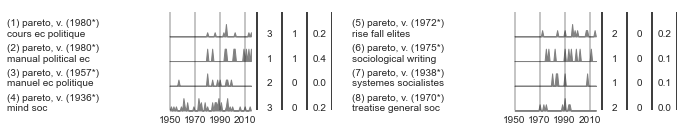

In [8]:
author_fig('Pareto, V.')

loading variable sociology-wos-74b/ind ___ c from disk
loading variable sociology-wos-74b/ind ___ c.fy from disk
loading variable sociology-wos-74b/ind ___ fy from disk


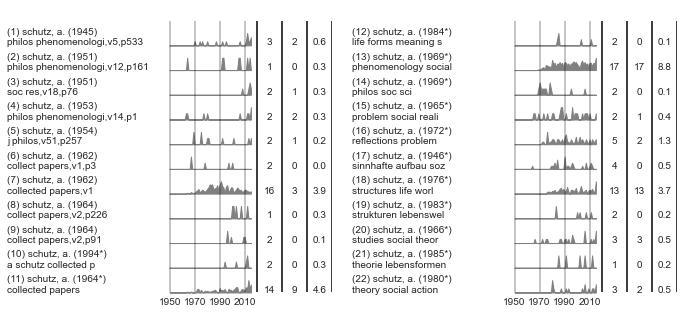

In [6]:
author_fig('Schutz, A.')

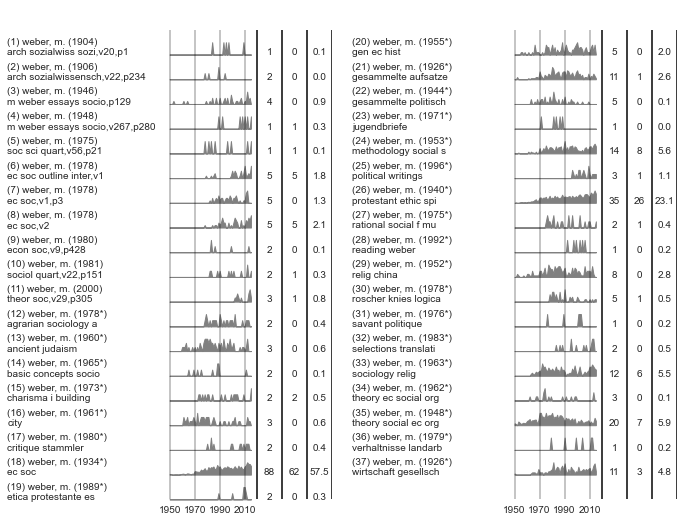

In [25]:
author_fig('Weber, M.')

loading variable sociology-wos-74b/ind ___ c.fy from disk
loading variable sociology-wos-74b/ind ___ fy from disk


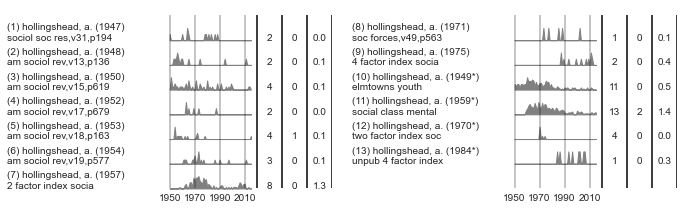

In [14]:
author_fig('Hollingshead, A.')

In [34]:
dta.search('c','Kalleberg, A.|')

['Kalleberg, A.|1973|sociol method res,v2,p215',
 'Kalleberg, A.|1974|soc sci res,v3,p299',
 'Kalleberg, A.|1977|am sociol rev,v42,p124',
 'Kalleberg, A.|1978|sociol work occup,v5,p371',
 'Kalleberg, A.|1979|annu rev sociol,v5,p351',
 'Kalleberg, A.|1979|social sci res,v0008',
 'Kalleberg, A.|1980|am j sociol,v85,p731',
 'Kalleberg, A.|1981|am j sociol,v87,p651',
 'Kalleberg, A.|1983|am sociol rev,v48,p78',
 'Kalleberg, A.|1984|ind labor relat rev,v37,p386',
 'Kalleberg, A.|1986|soc sci res,v15,p269',
 'Kalleberg, A.|1988|am j sociol,v94,ps121',
 'Kalleberg, A.|1988|annu rev sociol,v14,p203',
 'Kalleberg, A.|1989|soc forces,v67,p582',
 'Kalleberg, A.|1990|admin sci quart,v35,p658',
 'Kalleberg, A.|1990|j marriage fam,v52,p331',
 'Kalleberg, A.|1991|acad manage j,v34,p136',
 'Kalleberg, A.|1995|res social stratific,v14,p237',
 'Kalleberg, A.|1996|am sociol rev,v61,p47',
 'Kalleberg, A.|2000|am sociol rev,v65,p256',
 'Kalleberg, A.|2000|annu rev sociol,v26,p341',
 'Kalleberg, A.|2001|bri

In [25]:
dta.search('c','Halbwachs')

['Halbwachs, M.|cadres sociaux memoi',
 'Halbwachs, M.|causes suicide',
 'Halbwachs, M.|collective memory',
 'Halbwachs, M.|morphologie sociale',
 'Halbwachs, M.|topographie legendai']

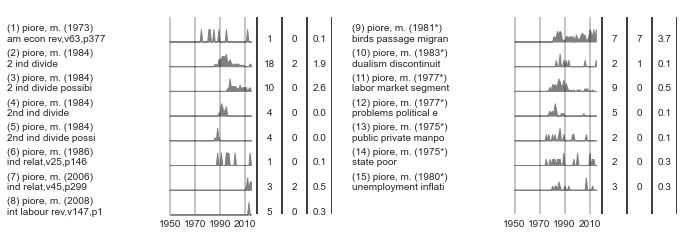

In [11]:
author_fig('Piore, M.')

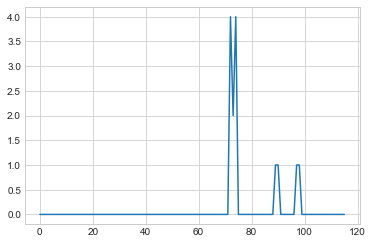

In [7]:
plt.plot(dta.trend('c','Reynolds, L.|sociology sociology').cits())

16


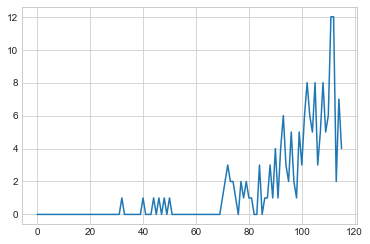

In [30]:
wt = dta.trend('ta','Dubois, W.')
plt.plot(wt.cits())
print(wt.sum_between(1970,1979))

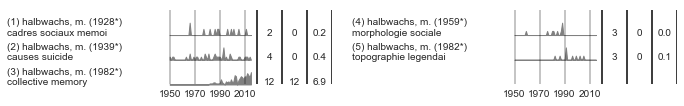

In [29]:
author_fig('Halbwachs, M.')

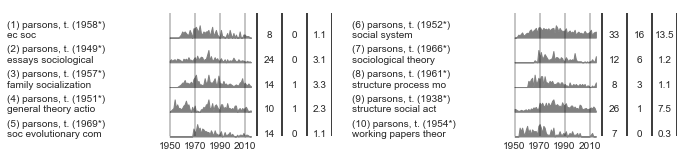

In [16]:
author_fig('Parsons, T.', limit=10)
plt.savefig('parsons_rocks.png', dpi=300)

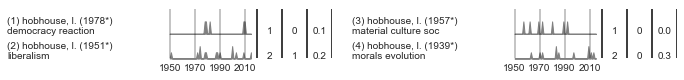

In [58]:
author_fig('Hobhouse, L.')

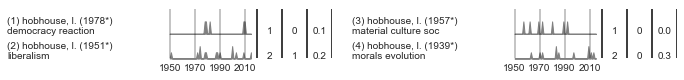

In [58]:
author_fig('Hobhouse, L.')

In [3]:
top = stats.top_decade_stratified(dta, 'c', percentile=0.02, yRange=(1930,2005), debug=False)

loading variable sociology-wos-74b/ind ___ c.fy from disk
loading variable sociology-wos-74b/ind ___ fy from disk
(2112, 12)


In [4]:
ks = [x for x in top['name'] if 'Lipset' in x]

In [5]:
l = []

for x in ks:
    tt = dta.trend('c', x)
    B,D = tt.births_deaths(death_cutoff=0.1)
    if len(D):
        print(x)
        l.append(x)
        plt.plot(tt.cits())
        plt.show()

In [6]:
ks = [x for x in top['name'] if 'Lipset' in x]

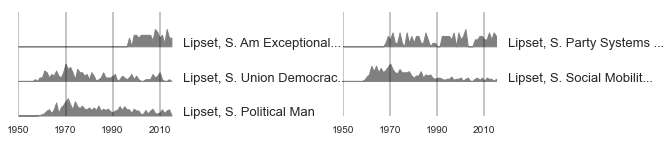

In [8]:
viz.yearly_counts_table_simp(dta,ks)

In [10]:
dta(ta='Lipset, S.', fj=None).cits.sort_values('count', ascending=False).head(10)

,fj,count
5,american sociological review,322
6,american journal of sociology,222
12,social forces,215
2,social science quarterly,120
14,british journal of sociology,97
29,canadian journal of sociology-cahiers canadien...,94
13,social problems,86
25,sociological quarterly,85
18,acta sociologica,64
28,sociological inquiry,63


In [15]:
dta.search('c', 'Khaldu')

[]

In [18]:
dta(c='Jephcott, P.|married women workin').cits

9

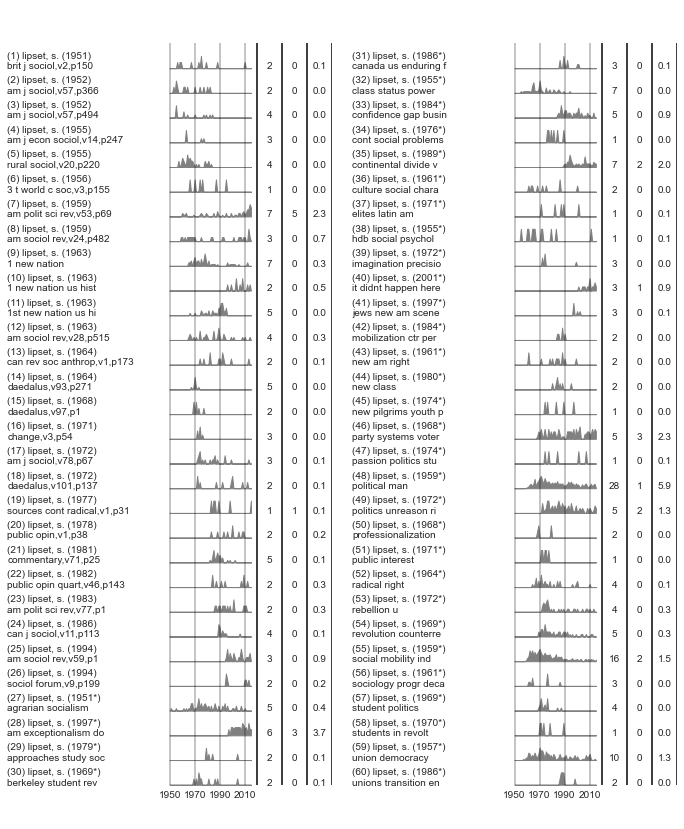

In [59]:
author_fig('Lipset, S.')

# forgotten founders

In [27]:
forgotten_founders = ["Jane Addams",
"Walter Benjamin",
"W.E.B. Du Bois",
"Harriet Martineau",
"Pitirim Sorokin",
"Flora Tristan",
"George E. Vincent",
"Beatrice Webb",
"John Stuart-Glennie",
"Annie Marion Maclean",
"Marianne Weber",
"Luther Bernard",
"Radhakamal Mukerjee",
"Gregory Stone",
"Carl Couch",
"Jack Douglas",
"Ben Agger"]

def fix(x):
    if 'Bois' in x:
        return 'Dubois, W.'
    x = x.split()
    return "%s, %s." % (x[-1], x[0][0])
forgotten_founders = [fix(x) for x in forgotten_founders]

In [28]:
forgotten_founders[:3]

['Addams, J.', 'Benjamin, W.', 'Dubois, W.']

In [35]:
[ 
    (x, dta(c=x).cits)
    for x in dta.search('c','Sorokin')
]

[('Sorokin, P.|1937|am j sociol,v42,p615', 51),
 ('Sorokin, P.|1937|social cultural dyna,v1', 10),
 ('Sorokin, P.|1941|social cultural dyna,v4', 8),
 ('Sorokin, P.|altruistic love stud', 14),
 ('Sorokin, P.|cont sociological th', 88),
 ('Sorokin, P.|crisis our age', 12),
 ('Sorokin, P.|fads foibles modern', 26),
 ('Sorokin, P.|man soc calamity', 8),
 ('Sorokin, P.|principles rural urb', 71),
 ('Sorokin, P.|reconstruction human', 6),
 ('Sorokin, P.|soc culture personal', 76),
 ('Sorokin, P.|social mobility', 266),
 ('Sorokin, P.|sociocultural causal', 21),
 ('Sorokin, P.|systematic sourceboo', 8),
 ('Sorokin, P.|time budgets human b', 17)]

# Addams, J.

loading variable sociology-wos-74b/ind ___ ta from disk
24 total cits


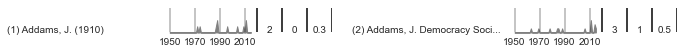

> Top 3 journals: american journal of sociology (4), theory and society (3), teaching sociology (2)

Journal entropy: 2.694153703984459

# Benjamin, W.

246 total cits


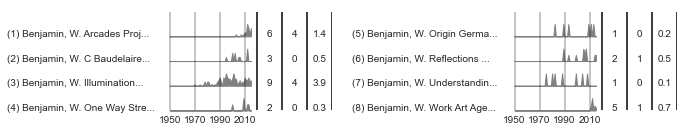

> Top 3 journals: comparative studies in society and history (29), media culture & society (26), annals of tourism research (25)

Journal entropy: 3.262907218981684

# Dubois, W.

189 total cits


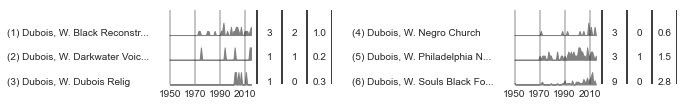

> Top 3 journals: social forces (21), ethnic and racial studies (16), american journal of sociology (14)

Journal entropy: 3.275749337022196

# Martineau, H.

11 total cits


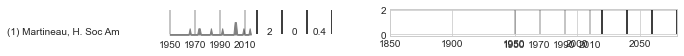

> Top 3 journals: sociological theory (2), social forces (2), teaching sociology (1)

Journal entropy: 2.1458417525947544

# Sorokin, P.

682 total cits


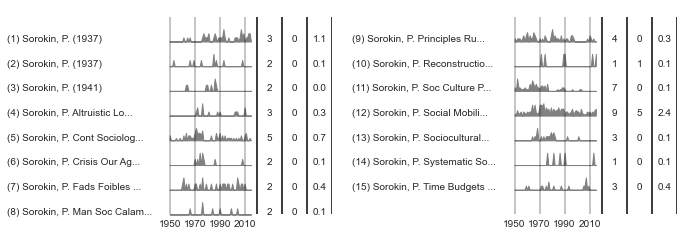

> Top 3 journals: american sociological review (109), rural sociology (74), american journal of sociology (73)

Journal entropy: 3.233554544259124

# Tristan, F.

0 total cits


> Nothing found...

# Vincent, G.

0 total cits


> Nothing found...

# Webb, B.

16 total cits


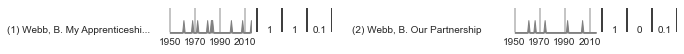

> Top 3 journals: sociology-the journal of the british sociological association (3), archives europeennes de sociologie (3), sociological review (2)

Journal entropy: 2.1873223188492537

# Stuart-Glennie, J.

0 total cits


> Nothing found...

# Maclean, A.

20 total cits


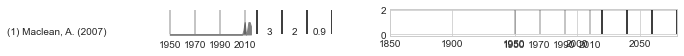

> Top 3 journals: armed forces & society (6), social science research (4), journal of marriage and family (2)

Journal entropy: 2.111630842505602

# Weber, M.

6181 total cits


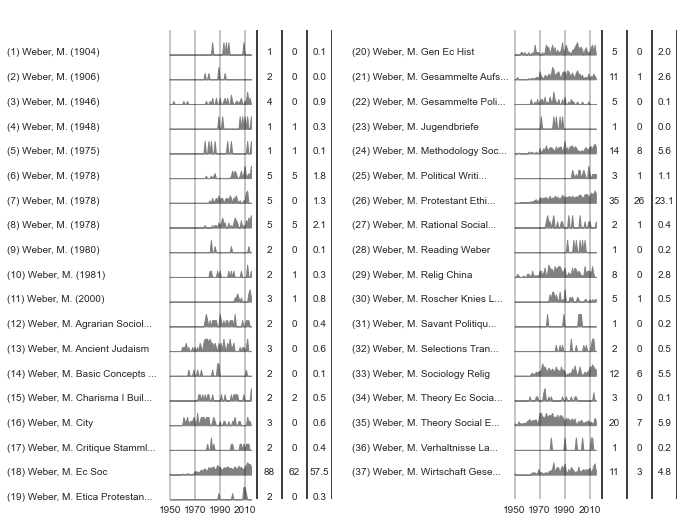

> Top 3 journals: american sociological review (388), american journal of sociology (386), british journal of sociology (344)

Journal entropy: 3.784273369216372

# Bernard, L.

9 total cits


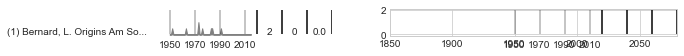

> Top 3 journals: social forces (2), sociology-the journal of the british sociological association (1), sociological quarterly (1)

Journal entropy: 2.0431918705451206

# Mukerjee, R.

0 total cits


> Nothing found...

# Stone, G.

279 total cits


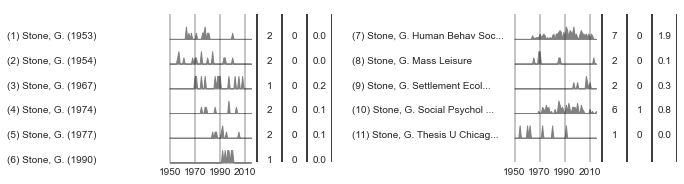

> Top 3 journals: symbolic interaction (78), sociological quarterly (39), american journal of sociology (18)

Journal entropy: 2.7359666689939024

# Couch, C.

158 total cits


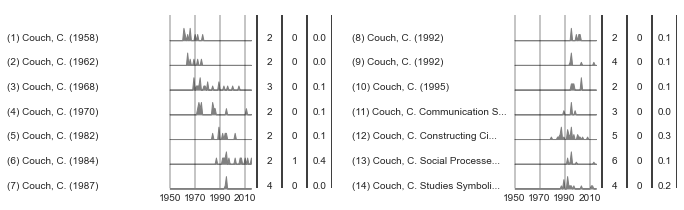

> Top 3 journals: symbolic interaction (79), sociological quarterly (34), american sociological review (7)

Journal entropy: 1.7630923034002324

# Douglas, J.

502 total cits


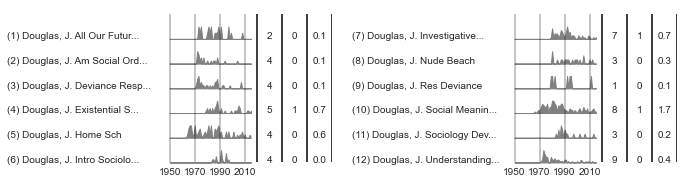

> Top 3 journals: deviant behavior (58), british journal of sociology (51), sociological review (49)

Journal entropy: 3.2109360491216274

# Agger, B.

37 total cits


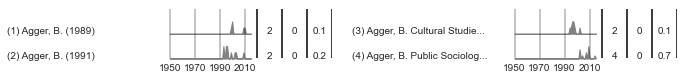

> Top 3 journals: canadian journal of sociology-cahiers canadiens de sociologie (5), teaching sociology (4), symbolic interaction (3)

Journal entropy: 2.765663976762661

In [32]:
for a in forgotten_founders:
   
    display(Markdown("# %s" % a))
    
    print(dta(ta=a).cits, 'total cits')
    
    try:
        viz.author_pub_table(dta, a)
        plt.savefig('founders.%s.png' % a.lower())
        plt.show()
        
        jcounts = dta(ta=a, fj=None).cits
        top_3 = list("%s (%s)" % (r['fj'], r['count']) for i,r in jcounts.sort_values('count')[::-1].iterrows())[:3]
        ps = np.array(list(jcounts['count']))
        ps = ps/ ps.sum()
        entropy = np.sum( -ps * np.log(ps) )
        display(Markdown("> Top 3 journals: %s" % ", ".join(top_3)))
        display(Markdown(f"Journal entropy: {entropy}"))
        
    except ValueError:
        display(Markdown("> Nothing found..."))
        
    

In [36]:
dta.search('ta','Znaniecki')

['Znaniecki, F.']

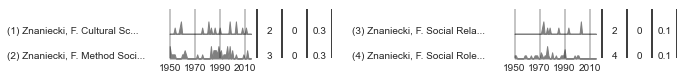

In [37]:
viz.author_pub_table(dta, 'Znaniecki, F.')

In [45]:
dta.search('c','Parsons, T.')

['Parsons, T.|1928|j polit econ,v36,p641',
 'Parsons, T.|1929|j polit econ,v37,p31',
 'Parsons, T.|1931|q j econ,v46,p101',
 'Parsons, T.|1934|q j econ,v48,p511',
 'Parsons, T.|1935|int j ethics,v45,p282',
 'Parsons, T.|1939|soc forces,v17,p457',
 'Parsons, T.|1940|am j sociol,v45,p841',
 'Parsons, T.|1940|can j econ polit sci,v6,p187',
 'Parsons, T.|1942|am sociol rev,v7,p604',
 'Parsons, T.|1943|am anthropol,v45,p22',
 'Parsons, T.|1947|psychiatr,v10,p167',
 'Parsons, T.|1951|am j orthopsychiat,v21,p452',
 'Parsons, T.|1951|gen theory action,p47',
 'Parsons, T.|1952|j soc issues,v8,p31',
 'Parsons, T.|1954|brit j sociol,v5,p101',
 'Parsons, T.|1956|admin sci quart,v1,p225',
 'Parsons, T.|1956|admin sci quart,v1,p63',
 'Parsons, T.|1957|world polit,v10,p123',
 'Parsons, T.|1959|am sociol rev,v24,p547',
 'Parsons, T.|1959|harvard educ rev,v29,p297',
 'Parsons, T.|1959|psychol study sci,v3',
 'Parsons, T.|1960|am sociol rev,v25,p467',
 'Parsons, T.|1960|e durkheim 1858 1917,p118',
 'Par

In [50]:
tt = dta.trend('c', 'Parsons, T.|toward general theor')

In [53]:
tt.last

1977

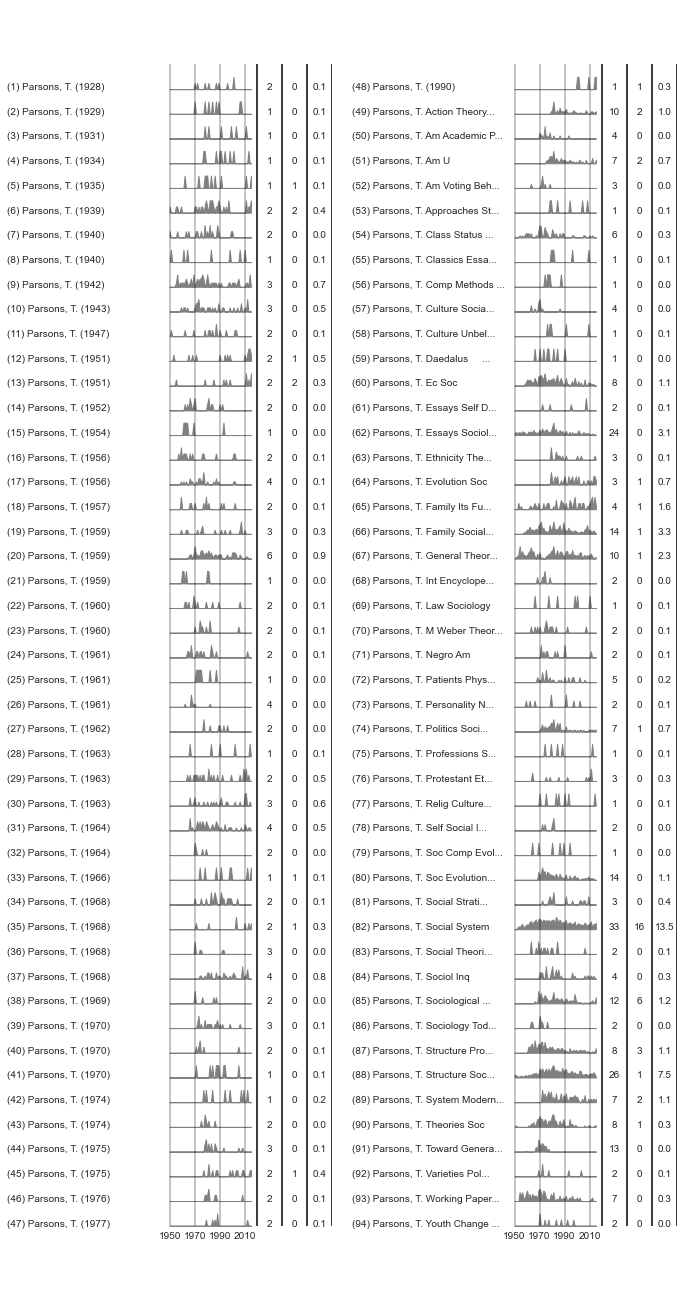

In [44]:
viz.author_pub_table(dta, 'Parsons, T.')

In [42]:
[ 
    (x, dta.trend('c', x).first)
    for x in dta.search('c', 'Parsons, T.|')
    if dta.trend('c', x).first == 1948
]

[('Parsons, T.|1943|am anthropol,v45,p22', 1948),
 ('Parsons, T.|m weber theory socia', 1948),
 ('Parsons, T.|theories soc', 1948)]